## (1) 데이터 가져오기
sklearn.datasets 의 load_diabetes 에서 데이터를 가져와주세요.
diabetes 의 data 를 df_X 에, target 을 df_y 에 저장해주세요.

In [1]:
import sklearn.datasets

dataset = sklearn.datasets.load_diabetes()

df_x=dataset.data
df_y=dataset.target

print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


## (2) 모델에 입력할 데이터 X 준비하기
df_X 에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [2]:
import numpy as np

df_X = np.array(df_x)
print(df_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


## (3) 모델에 예측할 데이터 y 준비하기
df_y 에 있는 값들을 numpy array로 변환해서 저장해주세요.

In [3]:
df_y = np.array(df_y)
print(df_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

## (4) train 데이터와 test 데이터로 분리하기
X 와 y  데이터를 각각 train 데이터와 test 데이터로 분리해주세요.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

## (5) 모델 준비하기
입력 데이터 개수에 맞는 가중치 W 와 b 를 준비해주세요.
모델 함수를 구현해주세요.

In [5]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i] 
    predictions += b # y = WX + b
    return predictions

## (6) 손실함수 loss 정의하기
손실함수를 MSE 함수로 정의해주세요.

In [6]:
def MSE(a, b):
  mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
  return mse

def loss(x, w, b, y):
  predictions = model(x, w, b)
  L = MSE(predictions, y)
  return L

## (7) 기울기를 구하는 gradient 함수 구현하기
기울기를 계산하는 gradient  함수를 구현해주세요.

In [7]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

## (8) 하이퍼 파라미터인 학습률 설정하기
학습률, learning rate 를 설정해주세요
만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.

In [9]:
LEARNING_RATE = 0.1

## (9) 모델 학습하기
정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
입력하는 데이터인 X 에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.

In [10]:
losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 500 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 500 : Loss 4065.7943
Iteration 1000 : Loss 3499.1420
Iteration 1500 : Loss 3268.3807
Iteration 2000 : Loss 3146.8060
Iteration 2500 : Loss 3075.4141
Iteration 3000 : Loss 3031.6652
Iteration 3500 : Loss 3004.2555
Iteration 4000 : Loss 2986.7919
Iteration 4500 : Loss 2975.4888
Iteration 5000 : Loss 2968.0557
Iteration 5500 : Loss 2963.0866
Iteration 6000 : Loss 2959.7074
Iteration 6500 : Loss 2957.3678
Iteration 7000 : Loss 2955.7171
Iteration 7500 : Loss 2954.5288
Iteration 8000 : Loss 2953.6549
Iteration 8500 : Loss 2952.9975
Iteration 9000 : Loss 2952.4909
Iteration 9500 : Loss 2952.0906
Iteration 10000 : Loss 2951.7660


learning rate을 0.1로, iteration을 10000번으로 하니 겨우 원하는 성능 만족

## (10) test 데이터에 대한 성능 확인하기

test 데이터에 대한 성능을 확인해주세요.

In [11]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2824.4654265833433

## (11) 정답 데이터와 예측한 데이터 시각화하기

x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.

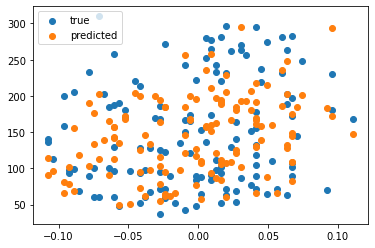

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="predicted")
plt.legend()
plt.show()

# 회고
분명히 예전 노드에서 배웠는데 자주 안쓰니까 잊어버렸다. 간단하고 자주쓰이는 코드는 암기해서 번거롭게 예전 자료 안찾아보고 쓸 수 있도록 해야겠다. 학습을 잘 시켜서 성능을 높이기 위해서 learning rate과 iteration을 적절히 바꿔줘야한다는걸 배웠다. 전체적으로 무리없이 잘 코드를 작성하여 만족한다.